In [ ]:
import numpy as np
import pandas as pd
import sklearn
import cv2
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from skimage.feature import local_binary_pattern
import pickle

In [ ]:
label_names = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral' ]

file = open('/content/Data/labels/list_label_train.txt','r')
lines = file.readlines()

ids, labels = [], []
for line in lines:

  id, label = line.strip().split(' ')
  ids.append(id)
  labels.append(label)

split = int( len(labels) * 0.80 )

train_ids, train_labels = ids[:split], labels[:split]
val_ids, val_labels = ids[split:], labels[split:]

In [ ]:
from utils import *

def read_data(label_filepath, data_dir, feature = 'lbp'):
  
  # train_ids, train_labels = read_lines('/content/Data/labels/list_label_train.txt')
  ids, labels = read_lines(label_filepath)

  # data_dir = '/content/Data/train/'
  print('total Images ', len(ids))
  features = []
  for id in ids:
    filepath = data_dir+id[:-4]+'_aligned'+id[-4:]

    img = cv2.imread(filepath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    feat = feature_extraction(img, feature)
    features.append(feat)

  return features, labels

In [ ]:
data_dir = '/content/Data/train/'
train_lbp, train_labels = read_data('/content/Data/labels/list_label_train.txt', data_dir,'lbp')

total Images  12271


In [ ]:
data_dir = '/content/Data/test/'
test_lbp, test_labels = read_data('/content/Data/labels/list_label_test.txt', data_dir,'lbp')

total Images  3068


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'weights':['uniform', 'distance'], 'n_neighbors':[3, 5, 6, 7, 9, 11],
              'algorithm' : ['auto', 'brute']}
model_knn = KNeighborsClassifier()
clf = GridSearchCV(model_knn, parameters, cv=10)
clf.fit(train_lbp, train_labels)

predictions = clf.predict(train_lbp)
print(classification_report(train_labels, predictions) )

              precision    recall  f1-score   support

           1       0.38      0.23      0.29      1290
           2       0.40      0.10      0.16       281
           3       0.28      0.08      0.12       717
           4       0.50      0.85      0.63      4772
           5       0.39      0.26      0.31      1982
           6       0.35      0.09      0.14       705
           7       0.46      0.30      0.36      2524

    accuracy                           0.47     12271
   macro avg       0.40      0.27      0.29     12271
weighted avg       0.44      0.47      0.42     12271



In [ ]:
import pickle
filename = 'lbp_knn.sav'
pickle.dump(clf, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
clf.best_params_

{'algorithm': 'brute', 'n_neighbors': 11, 'weights': 'uniform'}

In [ ]:
predictions = clf.predict(test_lbp)
print(classification_report(test_labels, predictions) )

              precision    recall  f1-score   support

           1       0.14      0.07      0.10       329
           2       0.24      0.05      0.09        74
           3       0.05      0.01      0.02       160
           4       0.45      0.77      0.57      1185
           5       0.22      0.16      0.18       478
           6       0.17      0.04      0.07       162
           7       0.31      0.19      0.23       680

    accuracy                           0.38      3068
   macro avg       0.23      0.19      0.18      3068
weighted avg       0.31      0.38      0.32      3068



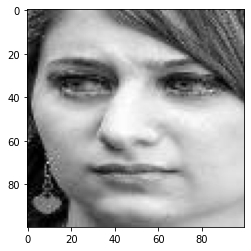

In [ ]:
# train_lbp[10]
import matplotlib.pyplot as plt
ab = '/content/Data/train/train_00001_aligned.jpg'
img = cv2.imread(ab)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

In [ ]:
import gc
gc.collect()

88

Hog - KNN

In [ ]:
import matplotlib.pyplot as plt
from skimage.feature import hog
img = cv2.imread('/content/Data/train/train_00001_aligned.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fd = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=False, multichannel=False)
fd.shape

(288,)

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import cv2
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  classification_report
from skimage.feature import local_binary_pattern

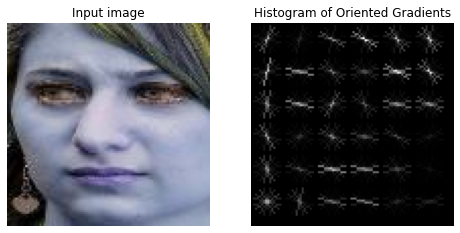

In [ ]:
# from skimage import exposure
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

# ax1.axis('off')
# ax1.imshow(img, cmap=plt.cm.gray)
# ax1.set_title('Input image')

# # Rescale histogram for better display
# hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# ax2.axis('off')
# ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
# ax2.set_title('Histogram of Oriented Gradients')
# plt.show()

In [ ]:
from utils import *
from sklearn.model_selection import GridSearchCV
def train_knn_hog(label_filepath, train_dir, test_fp, test_dir):
    
    train_hog, train_labels = read_data(label_filepath, train_dir,'hog')
    
    # print(train_hog[0].shape)
    print('Grid searching the optimum parameters, it will take some time ... ')
    parameters = {'weights':['uniform', 'distance'], 'n_neighbors':[3, 5, 6, 7, 9, 11],
              'algorithm' : ['auto', 'brute']}
    model_knn = KNeighborsClassifier()
    
    clf = GridSearchCV(model_knn, parameters, cv=10)
    
    clf.fit(train_hog, train_labels)

    predictions = clf.predict(train_hog)
    print('training results')
    print(classification_report(train_labels, predictions) )
    
    
    test_hog, test_labels = read_data(test_fp, test_dir,'hog')
    predictions = clf.predict(test_hog)
    print('Testing results')
    print(classification_report(test_labels, predictions) )
    
    filename = '../Models/hog_knn.sav'
    pickle.dump(clf, open(filename, 'wb'))
    
    print('Model has been saved at {}'.format(filename))

In [ ]:
train_dir, test_dir = '/content/Data/train/', '/content/Data/test/'
label_filepath = '/content/Data/labels/list_label_train.txt'
test_fp = '/content/Data/labels/list_label_test.txt'
    
# train_knn_hog(label_filepath, train_dir, test_fp, test_dir)

SUpport Vector Machine, Hog

In [ ]:
from utils import *
from sklearn.model_selection import GridSearchCV
from sklearn import svm

def train_svm_hog(label_filepath, train_dir, test_fp, test_dir):
    
    train_hog, train_labels = read_data(label_filepath, train_dir,'hog')
    
    # print(train_hog[0].shape)
    print('Grid searching the optimum parameters, it will take some time ... ')
    parameters = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'C':[0.001, 0.01, 0.1, 1, 2, 2, 4],
              'gamma' : ['auto', 'scale']}

    model_svm = svm.SVC()
    
    clf = GridSearchCV(model_svm, parameters, cv=10)
    
    clf.fit(train_hog, train_labels)

    predictions = clf.predict(train_hog)
    print('training results')
    print(classification_report(train_labels, predictions) )
    
    
    test_hog, test_labels = read_data(test_fp, test_dir,'hog')
    predictions = clf.predict(test_hog)
    print('Testing results')
    print(classification_report(test_labels, predictions) )
    
    filename = '../Models/hog_knn.sav'
    pickle.dump(clf, open(filename, 'wb'))
    
    print('Model has been saved at {}'.format(filename))

train_dir, test_dir = '/content/Data/train/', '/content/Data/test/'
label_filepath = '/content/Data/labels/list_label_train.txt'
test_fp = '/content/Data/labels/list_label_test.txt'
    
train_svm_hog(label_filepath, train_dir, test_fp, test_dir)

total Images  12271
Extracting LBP Features ....
Grid searching the optimum parameters, it will take some time ... 


Convulutional Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, experimental, Dropout
from tensorflow.keras.models import Sequential
from utils import *

import warnings
import random
import matplotlib.pyplot as plt

warnings.simplefilter("ignore")

In [ ]:
from utils import *
# train_ids, train_labels = read_lines('/content/Data/labels/list_label_train.txt' )
ids, labels = read_lines('/content/Data/labels/list_label_train.txt')

print('total Images ', len(ids))
data_dir = '/content/Data/train/'
train_images = []
for id in ids:
  
  filepath = data_dir+id[:-4]+'_aligned'+id[-4:]
  img = cv2.imread(filepath)
  # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  train_images.append(img/255)

labels = [int(s)-1 for s in labels]

total Images  12271


In [ ]:
import random

c = list(zip(train_images, labels ))
random.shuffle(c)
train_images, labels = zip(*c)


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, experimental, Dropout
from tensorflow.keras.models import Sequential

model = Sequential([
  
  # experimental.preprocessing.Rescaling(1./255, input_shape=(100, 100, 3) ),
  # experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  # experimental.preprocessing.RandomRotation(0.2),                                               
  Conv2D(32, 7, input_shape=(100, 100, 3), padding='same', activation='relu'),
  MaxPooling2D(),
  Dropout(0.5),
  Conv2D(64, 3, padding='same', activation='relu'),
  # MaxPooling2D(),
  # Dropout(0.5),
  Conv2D(16, 5, activation='tanh'),
  MaxPooling2D(),
  Flatten(),
  Dropout(0.5),
  # Dense(1024, activation='tanh'),
  Dense(128, activation='relu'),
  Dense(7, activation='softmax')
])


opt = tf.keras.optimizers.Adam(learning_rate=1e-05)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      4736      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 16)        25616     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8464)              0

In [ ]:
epochs=150
history = model.fit(
  np.array(train_images), np.array(labels), validation_split=0.2, epochs=epochs, batch_size=128)

Epoch 1/150
77/77 [==============================] - 39s 75ms/step - loss: 1.8189 - accuracy: 0.2982 - val_loss: 1.6843 - val_accuracy: 0.3878
Epoch 2/150
77/77 [==============================] - 4s 57ms/step - loss: 1.6563 - accuracy: 0.3853 - val_loss: 1.6722 - val_accuracy: 0.3882
Epoch 3/150
77/77 [==============================] - 4s 58ms/step - loss: 1.6439 - accuracy: 0.3931 - val_loss: 1.6511 - val_accuracy: 0.3910
Epoch 4/150
77/77 [==============================] - 5s 59ms/step - loss: 1.6153 - accuracy: 0.4040 - val_loss: 1.6345 - val_accuracy: 0.4008
Epoch 5/150
77/77 [==============================] - 4s 59ms/step - loss: 1.6157 - accuracy: 0.3912 - val_loss: 1.6117 - val_accuracy: 0.4187
Epoch 6/150
77/77 [==============================] - 5s 59ms/step - loss: 1.5855 - accuracy: 0.4124 - val_loss: 1.5907 - val_accuracy: 0.4244
Epoch 7/150
77/77 [==============================] - 5s 59ms/step - loss: 1.5660 - accuracy: 0.4206 - val_loss: 1.5692 - val_accuracy: 0.4326
Epoch

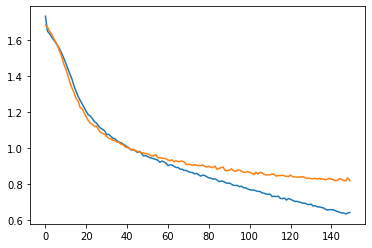

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Training Loss')
plt.savefig('loss_graphs.png')
plt.show()

In [ ]:
import warnings
warnings.simplefilter("ignore")

label_names = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral' ]
model.save('cnn_model.h5')
predictions = model.predict_classes( np.array(train_images) )

print( classification_report(np.array( labels),  predictions, target_names=label_names) )

              precision    recall  f1-score   support

    Surprise       0.85      0.74      0.79      1290
        Fear       0.80      0.53      0.64       281
     Disgust       0.68      0.47      0.55       717
   Happiness       0.90      0.90      0.90      4772
     Sadness       0.72      0.73      0.72      1982
       Anger       0.80      0.70      0.75       705
     Neutral       0.70      0.85      0.77      2524

    accuracy                           0.80     12271
   macro avg       0.78      0.70      0.73     12271
weighted avg       0.80      0.80      0.80     12271



In [ ]:
# train_ids, train_labels = read_lines('/content/Data/labels/list_label_train.txt' )
ids, test_labels = read_lines('/content/Data/labels/list_label_test.txt')

print('total Images ', len(ids))
data_dir = '/content/Data/test/'
test_images = []
for id in ids:
  
  filepath = data_dir+id[:-4]+'_aligned'+id[-4:]
  img = cv2.imread(filepath)
  test_images.append(img/255)

test_labels = [int(s)-1 for s in test_labels]

total Images  3068


In [ ]:
predictions = model.predict_classes( np.array(test_images) )
print( classification_report(np.array( test_labels),  predictions, target_names=label_names) )

              precision    recall  f1-score   support

    Surprise       0.80      0.64      0.71       329
        Fear       0.63      0.43      0.51        74
     Disgust       0.49      0.33      0.39       160
   Happiness       0.85      0.87      0.86      1185
     Sadness       0.57      0.57      0.57       478
       Anger       0.64      0.60      0.62       162
     Neutral       0.65      0.76      0.70       680

    accuracy                           0.72      3068
   macro avg       0.66      0.60      0.62      3068
weighted avg       0.72      0.72      0.72      3068



In [ ]:
# loaded_model = tf.keras.models.load_model('cnn_model.h5')

In [ ]:
def cnn_predictions(model, images, true_labels):

  label_names = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral' ]
  predictions = model.predict_classes( np.array(images) )

  print( classification_report(np.array(true_labels),  predictions, target_names=label_names) )

In [ ]:
def loss_plot(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Training Loss')
  plt.savefig('loss_graphs.png')
  plt.show()

def train_cnn():

  ids, labels = read_lines('/content/Data/labels/list_label_train.txt')

  # print('total Images ', len(ids))
  data_dir = '/content/Data/train/'
  train_images = []
  for id in ids:
  
    filepath = data_dir+id[:-4]+'_aligned'+id[-4:]
    img = cv2.imread(filepath)
  
    train_images.append(img/255)

  labels = [int(s)-1 for s in labels]

  c = list(zip(train_images, labels ))
  random.shuffle(c)
  train_images, labels = zip(*c)

  # Network Architecture

  model = Sequential([
                    
  Conv2D(32, 7, input_shape=(100, 100, 3), padding='same', activation='relu'),
  MaxPooling2D(),
  Dropout(0.5),
  Conv2D(64, 3, padding='same', activation='relu'),
  Dropout(0.5),
  Conv2D(16, 5, activation='tanh'),
  MaxPooling2D(),
  Flatten(),
  Dropout(0.5),
  Dense(128, activation='relu'),
  Dense(7, activation='softmax')
  ])


  opt = tf.keras.optimizers.Adam(learning_rate=3e-05)
  model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

  print( model.summary() )

  #Fitting model
  history = model.fit(
  np.array(train_images), np.array(labels), validation_split=0.2, epochs=100, batch_size=128)

  loss_plot(history)

  cnn_predictions(model, train_images, labels)
  
  #predictions on test data
  model.save('cnn_model.h5')

  ids, test_labels = read_lines('/content/Data/labels/list_label_test.txt')

  data_dir = '/content/Data/test/'
  test_images = []
  for id in ids:
  
    filepath = data_dir+id[:-4]+'_aligned'+id[-4:]
    img = cv2.imread(filepath)
    test_images.append(img/255)

  test_labels = [int(s)-1 for s in test_labels]
  cnn_predictions(model, test_images, test_labels)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      4736      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 16)        25616     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 16)        0

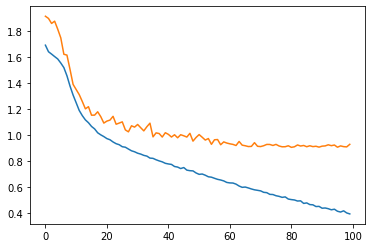

              precision    recall  f1-score   support

    Surprise       0.90      0.86      0.88      1290
        Fear       0.64      0.77      0.70       281
     Disgust       0.81      0.72      0.76       717
   Happiness       0.92      0.96      0.94      4772
     Sadness       0.92      0.70      0.79      1982
       Anger       0.77      0.90      0.83       705
     Neutral       0.82      0.90      0.86      2524

    accuracy                           0.87     12271
   macro avg       0.83      0.83      0.82     12271
weighted avg       0.88      0.87      0.87     12271

              precision    recall  f1-score   support

    Surprise       0.78      0.66      0.72       329
        Fear       0.46      0.55      0.50        74
     Disgust       0.44      0.39      0.41       160
   Happiness       0.82      0.91      0.87      1185
     Sadness       0.73      0.47      0.58       478
       Anger       0.56      0.70      0.62       162
     Neutral       0.69 

In [ ]:
train_cnn()

<h2> Testing </h2>

In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Goldstein.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
%cd Code

/content/Code


In [ ]:
!python models.py

2021-04-28 16:49:47.191128: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
total Images  12271
Extracting Features ....
Grid searching the optimum parameters, it will take some time ... 
training results
              precision    recall  f1-score   support

    Surprise       0.37      0.22      0.28      1290
        Fear       0.38      0.06      0.11       281
     Disgust       0.32      0.08      0.12       717
   Happiness       0.48      0.87      0.62      4772
     Sadness       0.42      0.21      0.28      1982
       Anger       0.29      0.05      0.08       705
     Neutral       0.44      0.28      0.34      2524

    accuracy                           0.46     12271
   macro avg       0.38      0.25      0.26     12271
weighted avg       0.43      0.46      0.40     12271

total Images  3068
Extracting Features ....
Testing results
              precision    recall  f1-score   support

    Surprise 

In [ ]:
import gc
gc.collect()

284

angry2.jpg
disgust4.jpg
surprise3.jpg
sad4.jpg


<Figure size 720x720 with 0 Axes>

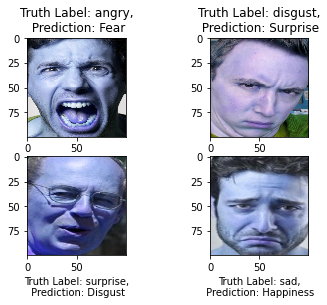

In [ ]:
from utils import *
import random
import pickle
from tensorflow.keras.models import load_model
import warnings
import os
warnings.simplefilter("ignore")

def plot_random(display_images, display_labels, predictions):

  plt.figure(figsize=(10,10))
  fig, ax = plt.subplots(2, 2)
  ax[0, 0].imshow(display_images[0], interpolation='nearest')
  ax[0, 0].set_title(f"Truth Label: {display_labels[0]},\n Prediction: {predictions[0]}")
  
  ax[0, 1].imshow(display_images[1], interpolation='nearest')
  ax[0, 1].set_title(f"Truth Label: {display_labels[1]},\n Prediction: {predictions[1]}")

  ax[1, 0].imshow(display_images[2], interpolation='nearest')
  ax[1, 0].set_xlabel(f"Truth Label: {display_labels[2]},\n Prediction: {predictions[2]}")

  ax[1, 1].imshow(display_images[3], interpolation='nearest')
  ax[1, 1].set_xlabel(f"Truth Label: {display_labels[3]},\n Prediction: {predictions[3]}")
  
  plt.show()


def random_cnn(path_to_testset, display_ind, ids, labels, personalized):
  
  process_images, display_labels, display_images = [], [], []
  label_names = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral' ]
  for ind in display_ind:
    id =ids[ind]

    if personalized:
      filepath = path_to_testset + id
      display_labels.append( id[:-5])
    else:
      filepath = path_to_testset+id[:-4]+'_aligned'+id[-4:]
      display_labels.append(label_names[int(labels[ind])-1] )
    
    img = cv2.imread(filepath)
    img = cv2.resize(img, (100,100))
    display_images.append(img)
    process_images.append(img/255)

  process_images = np.array(process_images)
  model = load_model('../Models/cnn_model.h5')
  # return process_images
  pred = model.predict_classes(process_images)
  predictions = [ label_names[k] for k in pred ]
  plot_random(display_images, display_labels, predictions)


def EmotionRecognition(path_to_testset, model_type, personalized=False):

  label_names = ['Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral' ]
  labels = []
  if not personalized:
    label_filepath = '../CW_Dataset/labels/list_label_test.txt'
    ids, labels = read_lines(label_filepath)
  else:
    ids = os.listdir(path_to_testset)
    ids = [id for id in ids if '.jpg' in id]
  # data_dir = '../CW_Dataset/test/'
  display_ind = random.sample(range(0, len(ids) ), 4)
  
  if model_type == 'lbp_knn':
    model_file = '../Models/lbp_knn.sav'
    model = pickle.load( open(model_file, 'rb') )
    feature = 'lbp'
  elif model_type == 'hog_knn':
    model_file = '../Models/hog_knn.sav'
    model = pickle.load( open(model_file, 'rb') )
    feature = 'hog'
  elif model_type == 'cnn':
    random_cnn(path_to_testset, display_ind, ids, labels, personalized)
    return
  else:
    print('Please Enter a correct model type')
    print('You can enter one of these:  - lbp_knn, hog_knn and cnn')
    return
  
  predictions, display_labels, display_images = [], [], []
  for ind in display_ind:
    id = ids[ind]
    if personalized:
      filepath = path_to_testset + id
      display_labels.append( id[:-5])
    else:
      
      filepath = path_to_testset+id[:-4]+'_aligned'+id[-4:]
      display_labels.append(label_names[int(labels[ind])-1] )
    
    img = cv2.imread(filepath)
    display_images.append(img)

    img = cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)
    img = cv2.resize(img, (100,100))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    feat = feature_extraction(img, feature)
    
    pred = model.predict(feat.reshape(1,-1))
    predictions.append( label_names[int(pred)-1] )

  plot_random(display_images, display_labels, predictions)
  
  # for i in range(0, len(predictions)):
b=EmotionRecognition('../Personal_Dataset/', 'cnn', True)